## MT09 - TP6 - Automne 2025
## Interpolation polynomiale


#### 1. Algorithme de Horner de calcul des polynômes
Ecrire une fonction
```
p = horn(a, t, theta)
```
qui, étant donné le tableau $a$ de coefficients $(a_0, a_1, ...,a_n)$, le tableau $t$
de valeurs $(t_0,t_1,...,t_{n-1})$ et le point courant $\theta$, calcule

$$
P(\theta) = a_0 + a_1(\theta-t_0)
+a_2(\theta-t_0)(\theta-t_1)
+...+ a_n (\theta-t_0)(\theta-t_1)...(\theta-t_{n-1})
$$

à l'aide de l'algorithme de Horner vu en cours (attention : appliqué ici à la base de Newton).

In [122]:
from mpmath import linspace


def horn(a, t, theta):
    # Algo : 
    # p = a_n
    # pour k= n-1 à 0 par pas de -1 faire:
    #    p = a_k + (t-t_k)*p
    # fin pour
    #
    n=len(a)
    p = a[-1]
    for k in range(n-2, -1, -1):
        p = a[k] + (theta - t[k]) * p

    return p

Vérification. - Appliquez l'algorithme au calcul du polynôme $p(x) = -1+2x-x^2+x^3$ et vérifiez que vous obtenez les bonnes valeurs de $p$ en $x=0$, $x=1$ et $x=2$.

In [123]:
import numpy as np
t = np.zeros(3)
a = np.array([-1, 2, -1, 1])
x=0; px = horn(a, t, x); print(px)
# ...
x=1; px = horn(a, t, x); print(px)
x=2; px = horn(a, t, x); print(px)

-1.0
1.0
7.0


### 2. Polynômes d'interpolation, forme de Newton
#### Différences divisées
Ecrire une fonction
```
d = diffdiv(y, t)
```
qui, étant donné le tableau $t=(t_0, t_1, .. t_{n})$, le tableau
$y=(y_0,...,y_n)$ avec
$y_0=f(t_0), \ y_1=f(t_1), ..., y_{n}=f(t_{n})$, calcule les différences divisées $f_0=f[t_0]$, $f_1=f[t_0,t_1]$, ..., $f_{n} = f[t_0, ..., t_n]$
(on suppose que les $t_i$ sont distincts deux à deux).

In [124]:
def diffdiv(y,t):
    n = y.size - 1
    # Algorithme : voir polycopié
    # Init
    # d = y
    # boucle pour k de 1 à n
    #   boucle pour i de n à (k-1) par pas de (-1)
    #       d_i = (d_i - d_{i-1)} / (t_i - t_{i-k}}
    #   fin pour
    # fin pour
    #
    d = y.copy()
    for k in range(1, n+1):
        for i in range(n, k-1, -1):
            d[i] = (d[i] - d[i-1]) / (t[i] - t[i-k])
    return d

Application numérique et vérification : considérer
$t=(1,\ 3,\ 4.5,\ 5,\ 6)$ et $y=(1,\ 5,\ 3,\ 7,\ -1)$.
Vous devez obtenir : 

`
d =  [ 1.          2.         -0.95238095  1.4047619  -1.3031746 ]
`

In [125]:
t=np.array([1, 3, 4.5, 5, 6], dtype=float)
y=np.array([1, 5, 3, 7, -1], dtype=float)
d = diffdiv(y, t)
print(d)

[ 1.          2.         -0.95238095  1.4047619  -1.3031746 ]


#### Interpolation polynomiale
En utilisant ```diffdiv()``` et ```horn()```, écrire une fonction
```
p = interpol(y, t, theta)
```
qui, étant donné $(y_0, y_1, ..., y_n)$, $(t_0, t_1, ..., t_n)$,
$\theta$ réels, calcule $p=P(\theta)$ où $P$ est le polynôme de degré inférieur ou égal à $n$ tel que $P(t_i)=y_i$. 

Application numérique : considérer $t=(1, \ 3, \ 4.5, \ 5, \ 6)$, $y=(1, \ 5, \ 3, \ 7, \ -1)$. Calculer $p$ dans le cas $\theta=3$ puis
$\theta=4$.

In [126]:
def interpol(y, t, theta):
    return horn(diffdiv(y, t), t, theta)

t=np.array([1, 3, 4.5, 5, 6], dtype=float)
y=np.array([1, 5, 3, 7, -1], dtype=float)

p3 = interpol(y, t, 3)
print(p3)

p4=interpol(y, t, 4)
print(p4)

5.0
0.08095238095238155


#### Tracé du polynôme d'interpolation
En considérant le tableau de valeurs de $\theta$
```
theta = np.linspace(1, 6, 200)
```
dans un graphique, tracez le polynôme d'interpolation $p$ pour les tableaux $t$ et $y$ ci-dessus. Sur le même graphique, affichez d'une autre couleur les points d'interpolationn $(t_i, y_i)$ ainsi que la fonction $f$ en ligne continue.

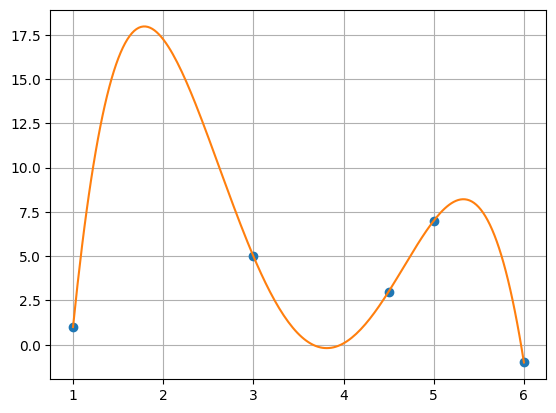

In [127]:
import matplotlib.pyplot as plt
theta = np.linspace(1, 6, 200)
p = interpol(y, t, theta)
plt.plot(t, y, 'o')
plt.plot(theta, p, '-')
plt.grid()
plt.show()

#### Phénomène de Runge
On considère maintenant la fonction 

$$
f(x) = \frac{1}{1+x^2}
$$

sur l'intervalle $[-5, 5]$. Considérez les tableaux de $t$, $y$ et $\theta$ définis par

```
t = np.linspace(-5, 5, N)
y = f(t)
theta = np.linspace(-5, 5, 200)
```

pour les valeurs de $N$ respectives : $N=5,\ 7,\ 10, 12, 13, 24$. 

Sur le même graphique, tracez les pints d'interpolation, la fonction d'origine ainsi que son interpolée polynomiale. 
Sur un 2è graphique, on tracera aussi la fonction d'erreur

$$
E_N(x) = f(x) - p_N(x).
$$

Le résultat est-il satisfaisant ?

ps : le phénomène d'instabilité observé se nomme le **phénomène de Runge**.

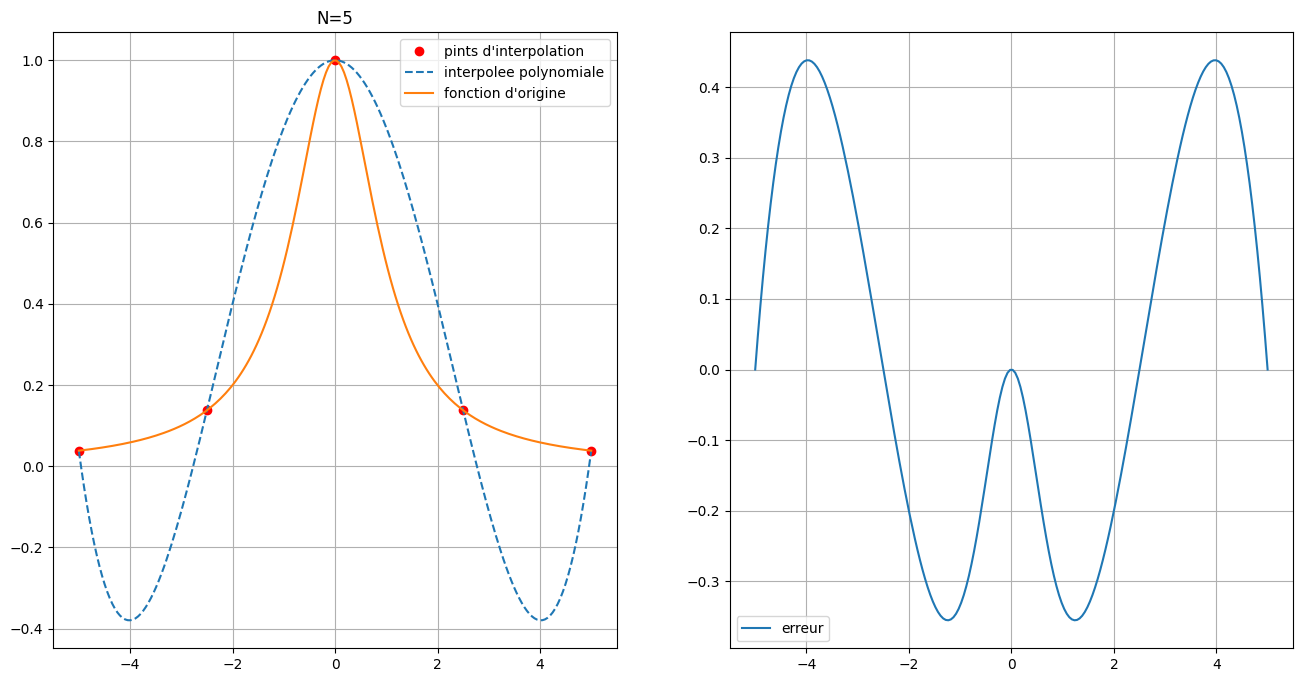

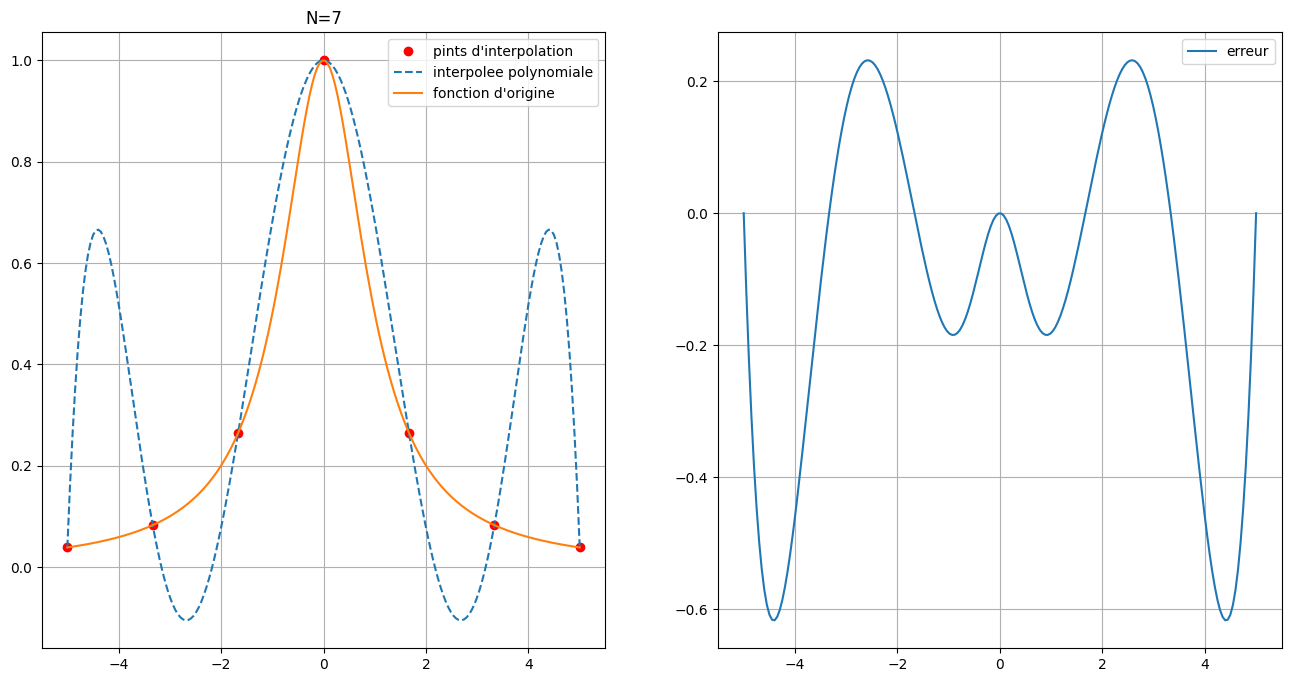

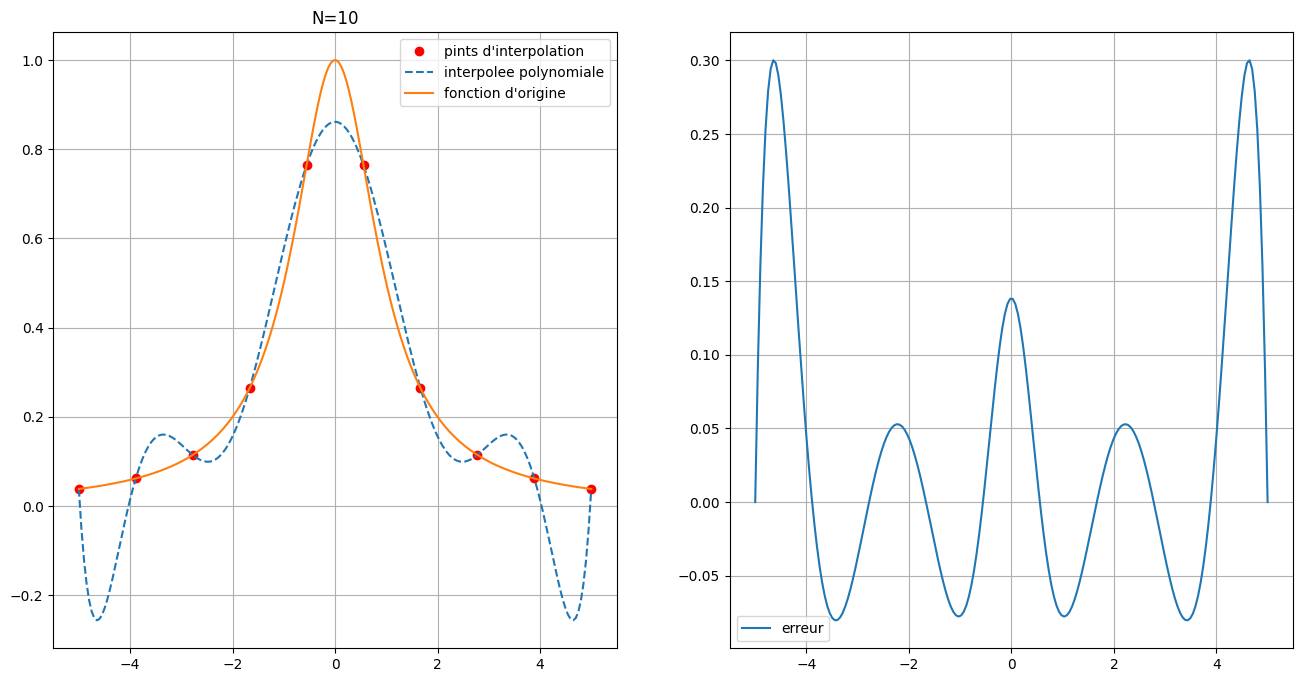

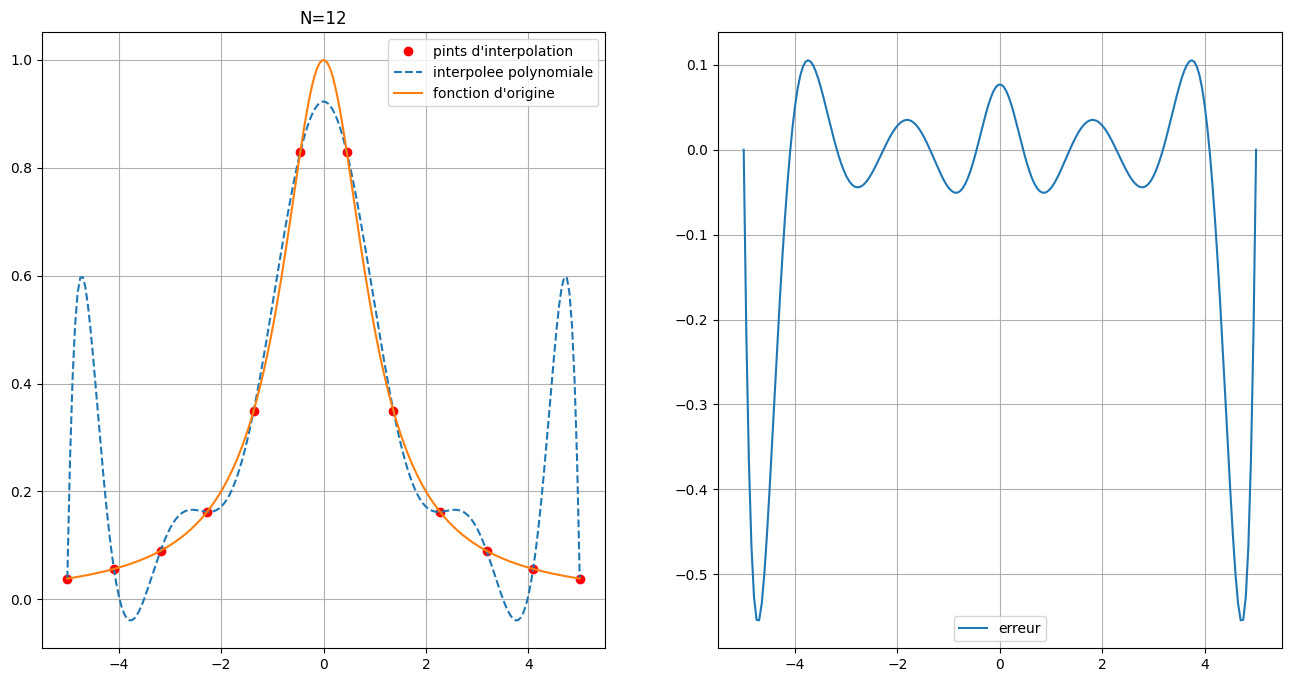

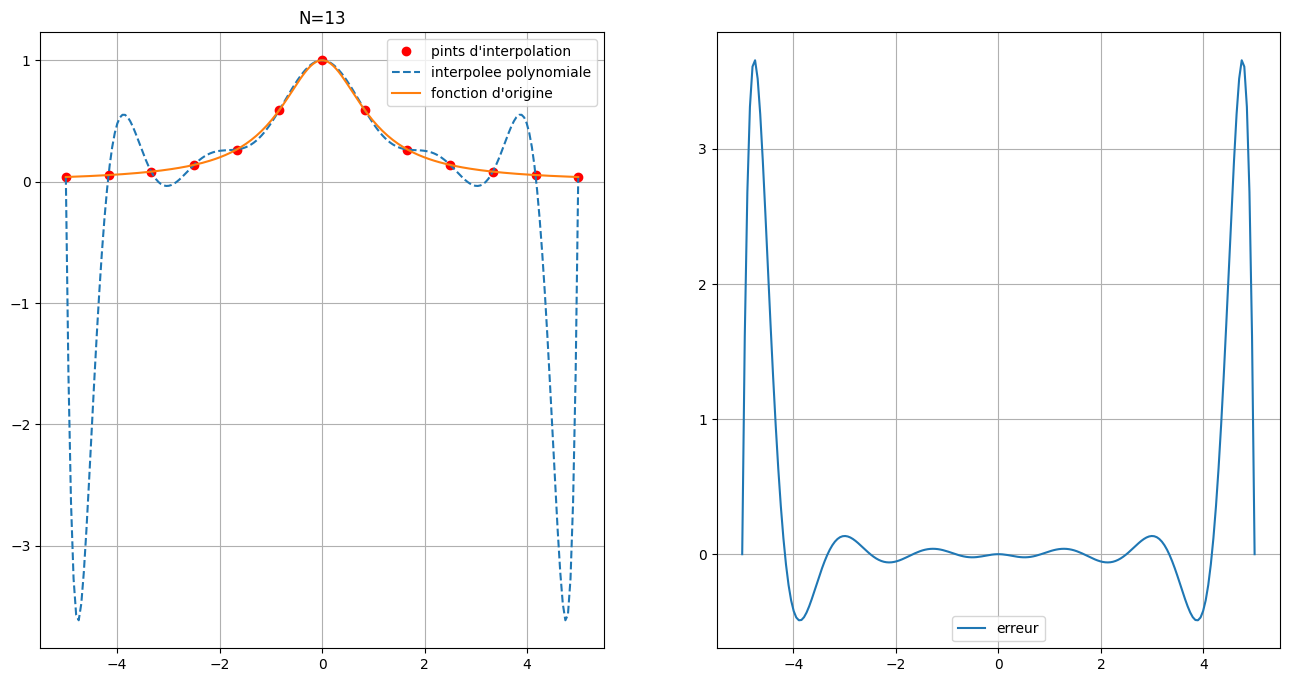

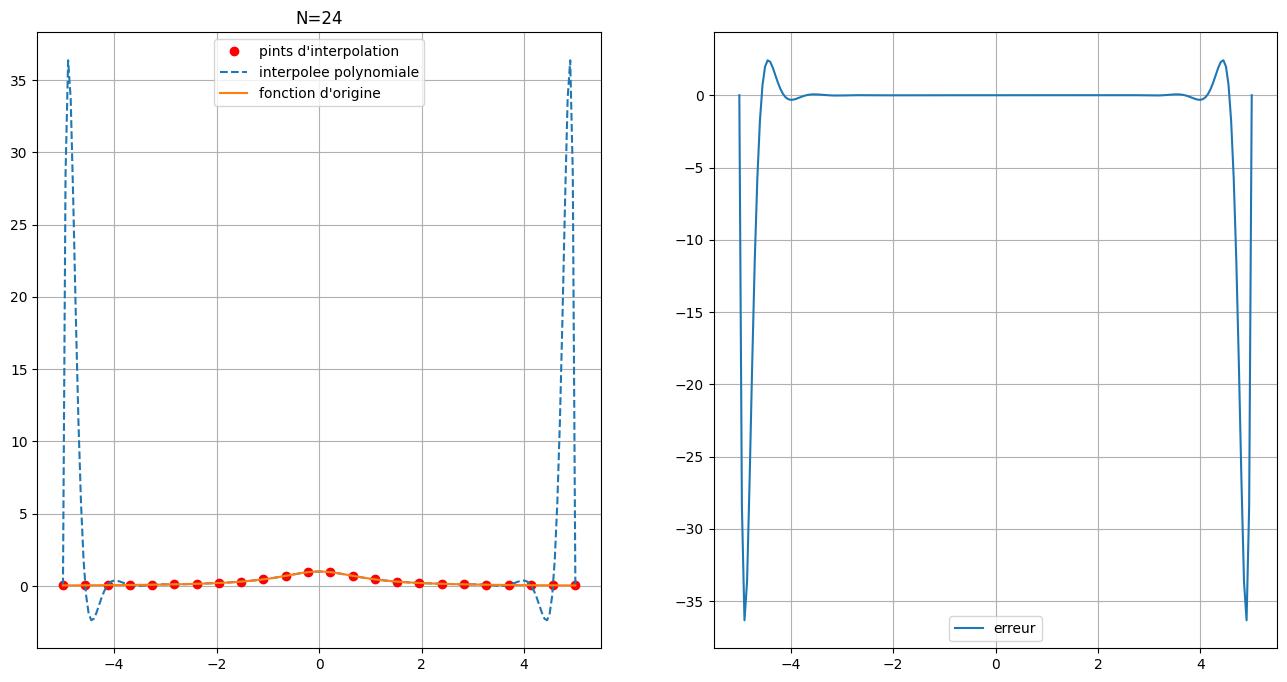

In [128]:
def f(t):
    return 1 / (1 + t ** 2)

for N in [5, 7, 10, 12, 13, 24]:
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    t = np.linspace(-5, 5, N)
    y = f(t)
    theta = np.linspace(-5, 5, 200)
    p = interpol(y, t, theta)
    plt.grid()
    plt.title("N="+str(N))
    plt.plot(t, y, 'ro', label="pints d'interpolation")
    plt.plot(theta, p, '--', label="interpolee polynomiale")
    plt.plot(theta, f(theta), '-', label="fonction d'origine")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(theta, f(theta) - p, '-', label="erreur")
    plt.legend()
    plt.grid()
    plt.show()

#### Points de Tchebychev
Refaire la même tâche mais en considérant cette fois-ci les points d'interpolation donnés par le tableau `tcheb` (points de Tchebychev) :

```
tcheb = np.cos( np.linspace(np.pi/(2*N) , (2*N-1)*np.pi/(2*N), N) ) # dans [-1, 1]
t = 5 * tcheb # dans [-5, 5]
y = f(t)
theta = np.linspace(-5, 5, 200)
```

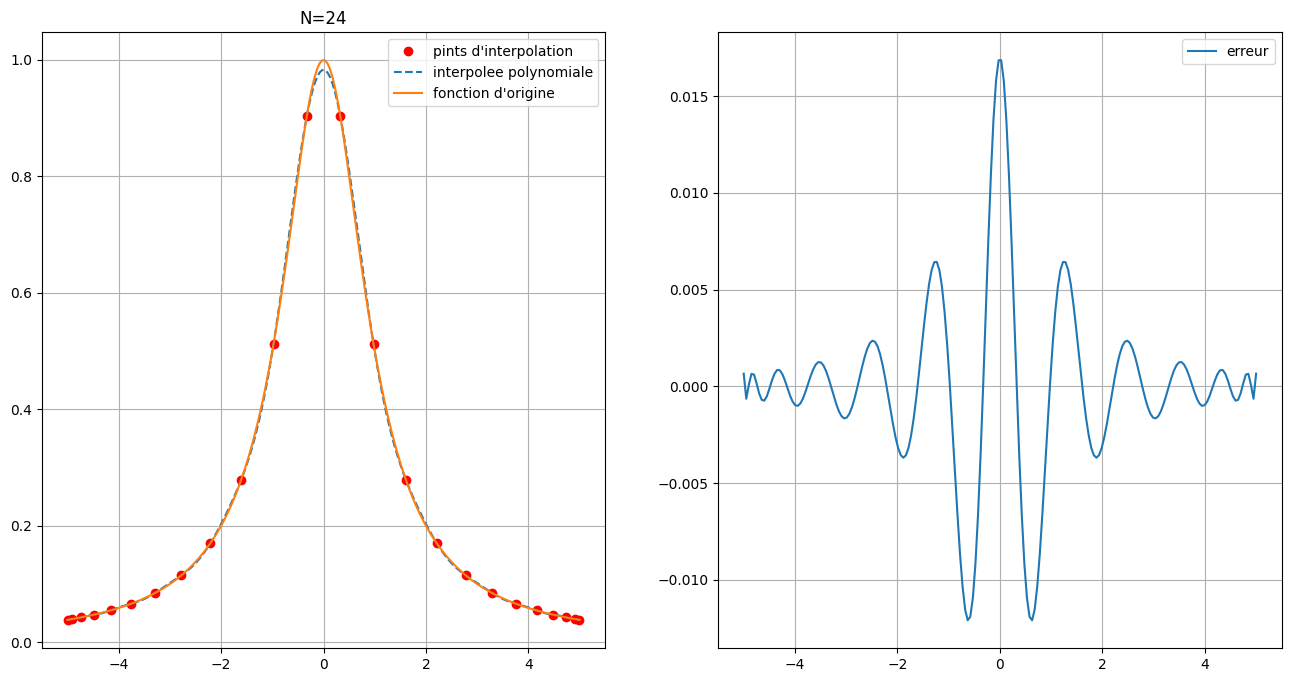

In [129]:
tcheb = np.cos( np.linspace(np.pi/(2*N) , (2*N-1)*np.pi/(2*N), N) )
t = 5 * tcheb
y = f(t)
theta = np.linspace(-5, 5, 200)
plt.figure(figsize=(16, 8))
p = interpol(y, t, theta)
plt.subplot(1, 2, 1)
plt.grid()
plt.title("N="+str(N))
plt.plot(t, y, 'ro', label="pints d'interpolation")
plt.plot(theta, p, '--', label="interpolee polynomiale")
plt.plot(theta, f(theta), '-', label="fonction d'origine")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta, f(theta) - p, '-', label="erreur")
plt.legend()
plt.grid()
plt.show()

### 3. Polynômes de Hermite

Sur le même graphique, tracer les 4 polynômes suivants sur l'intervalle $[0,1]$ (vus en TD) :

\begin{align*}
& p_1(x) = (1-x)^2(2x+1), \\
& p_2(x) = x^2(3-2x), \\
& p_3(x) = x(1-x)^2, \\
& p_4(x) = -(1-x)x^2.
\end{align*}

Quelles sont les propriétés de $p_1$, $p_2$, $p_3$, $p_4$ ?

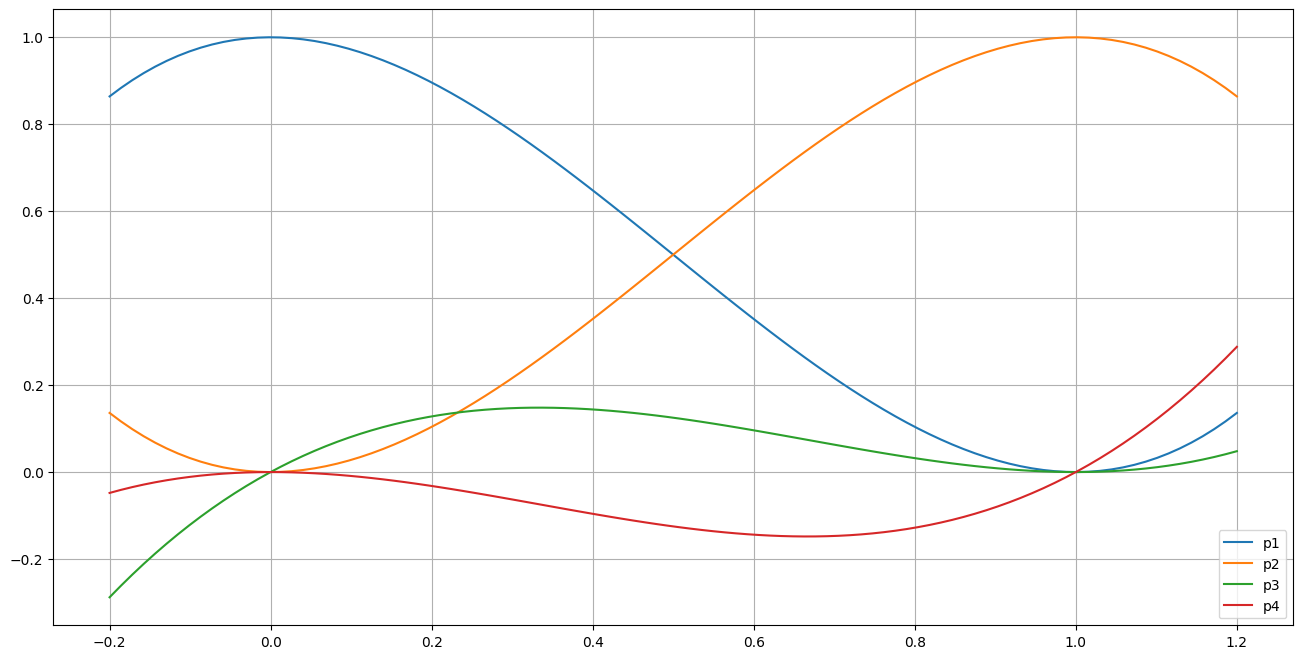

In [130]:
def p1(x):
    return (1-x)**2*(2*x+1)
def p2(x):
    return x**2*(3-2*x)
def p3(x):
    return x*(1-x)**2
def p4(x):
    return -(1-x)*x**2

plt.figure(figsize=(16, 8))
x=np.linspace(-0.2,1.2,100)
plt.plot(x,p1(x), label="p1")
plt.plot(x,p2(x), label="p2")
plt.plot(x,p3(x), label="p3")
plt.plot(x,p4(x), label="p4")
plt.legend()
plt.grid()
plt.show()

À partir de $(p_1,p_2,p_3,p_4)$, construire le polynôme d'interpolation $p$ de degré inférieur ou égal à 3 tel que

$$
p(0) = y_0, \quad p'(0) = d_0, \quad p(1) = y_1, \quad p'(1)= d_1.
$$
Application : on prendra les valeurs $y_0 = 3$, $d_0 = 0$, $y_1 = 2$, $d_1=1$.

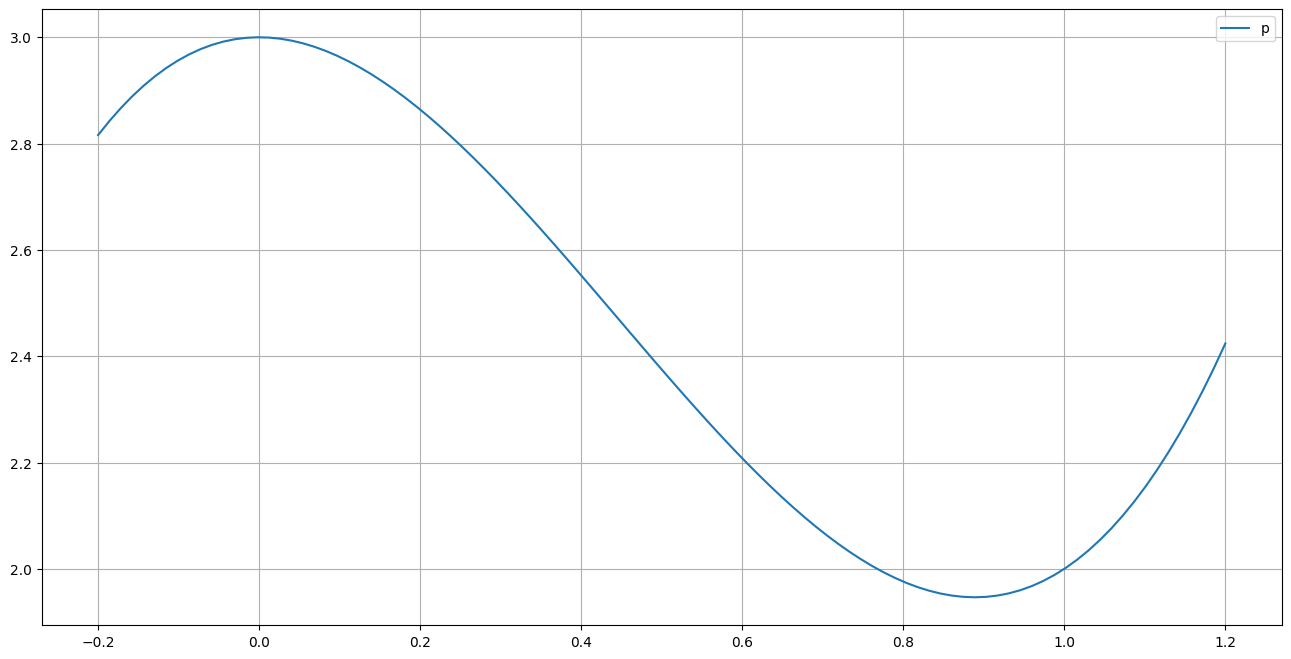

In [131]:
y0=3
d0=0
y1=2
d1=1

def p(x):
    p=y0*p1(x)+y1*p2(x)+d0*p3(x)+d1*p4(x)
    return p

plt.figure(figsize=(16, 8))
x=np.linspace(-0.2,1.2,100)
plt.plot(x,p(x), label="p")
plt.legend()
plt.grid()
plt.show()

Dans une fonction python, définir une fonction $q$ polynomiale de degré 3 par morceaux telle que
* $q(x) = p_1(x)$ sur l'intervalle $[0,1]$
* $q(x) = p_2(x+1)$ sur l'intervalle $[-1,0]$
* $q(x) = 0$ ailleurs

Tracer $q$ sur l'intervalle $[-2,2]$. Quelles sont les propriétés de $q$ autres que les conditions données ?

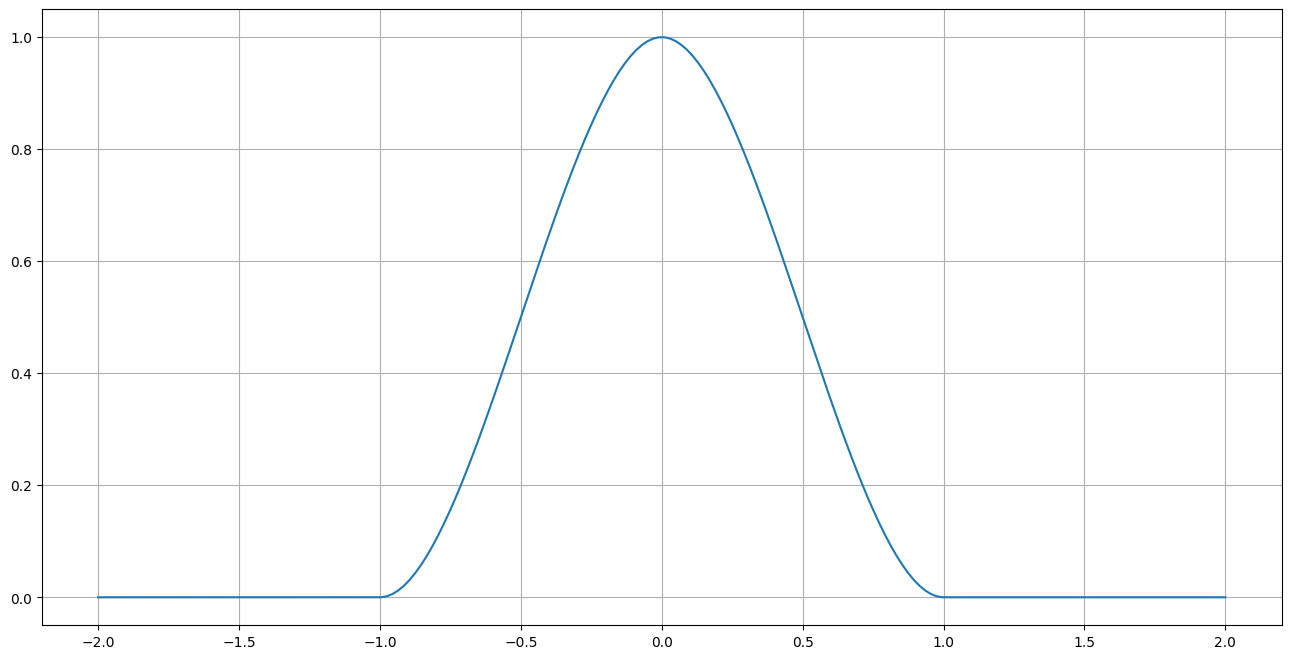

q(0)=1,q'(0)=0


In [132]:
def q(x):
    q = np.zeros_like(x)
    for i in range(x.shape[0]):
        if (x[i] >= -1) and (x[i] < 0):
            q[i]=p2(x[i]+1)
        elif (x[i] >= 0) and (x[i] <= 1):
            q[i]=p1(x[i])
    return q

x=np.linspace(-2,2,100)
y=q(x)
plt.figure(figsize=(16, 8))
plt.plot(x, y)
plt.grid()
plt.show()

print("q(0)=1,q'(0)=0")


Dans une fonction python, définir une fonction $r$ polynomiale de degré 3 par morceaux telle que
* $r(x) = p_3(x)$ sur l'intervalle $[0,1]$
* $r(x) = p_4(x+1)$ sur l'intervalle $[-1,0]$
* $r(x) = 0$ ailleurs

Tracer $r$ sur l'intervalle $[-2,2]$. Quelles sont les propriétés de $r$ autres que les conditions données ?

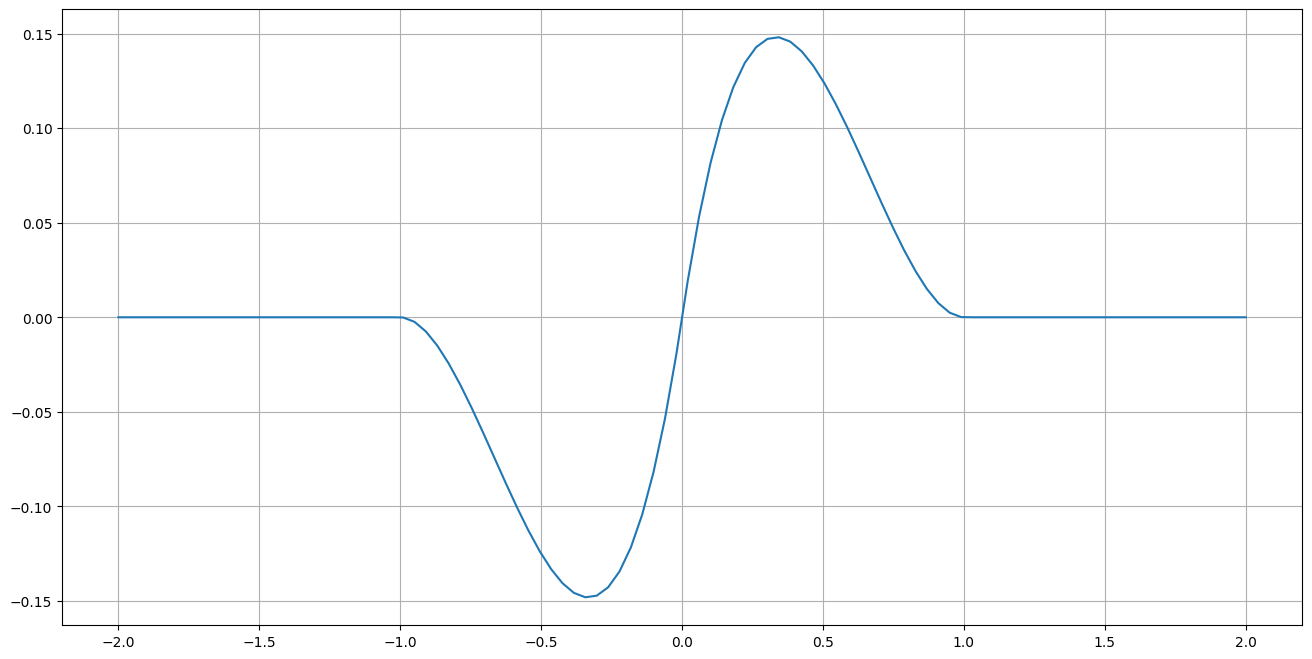

r(0)=0,sur la symétrie à l'origine


In [133]:
def r(x):
    r = np.zeros_like(x)
    for i in range(x.shape[0]):
        if (x[i] >= -1) and (x[i] < 0):
            r[i] = p4(x[i] + 1)
        elif (x[i] >= 0) and (x[i] <= 1):
            r[i] = p3(x[i])
    return r

x=np.linspace(-2,2,100)
z=r(x)
plt.figure(figsize=(16, 8))
plt.plot(x, z)
plt.grid()
plt.show()

print("r(0)=0,sur la symétrie à l'origine")

À partir de $q$ et $r$, on va pouvoir définir une fonction d'interpolation polynomiale par morceaux (mais non globalement polynomiale). On considère le tableau de points d'interpolation

$$
t = [-5, -4, ..., 0, ..., 4, 5]
$$

et la fonction $s(\theta)$ définie par

$$
s(\theta) = \sum_{i=0}^N \left\{ f(t_i)\, q(\theta-t_i)
+ f'(t_i)\, r(\theta-t_i) \right\}
$$

Définir d'abord une fonction ```fprim(t)``` qui calcule la dérivée de $f$ en $x$.
Définir ensuite une fonction ```interpol(y, z, t, theta)``` qui calcule $s(\theta)$
étant donné les tableaux $t$ (```t = np.arange(-5.0, 6.0, 1.0)```) et

$$
y=(f(t_0), f(t_1), ... , f(t_N)),\qquad 
z=(f'(t_0), f'(t_1), ... , f'(t_N)). 
$$

Tracer enfin la fonction $s$ sur l'intervalle $[-5,5]$ et comparer à la fonction $f$.

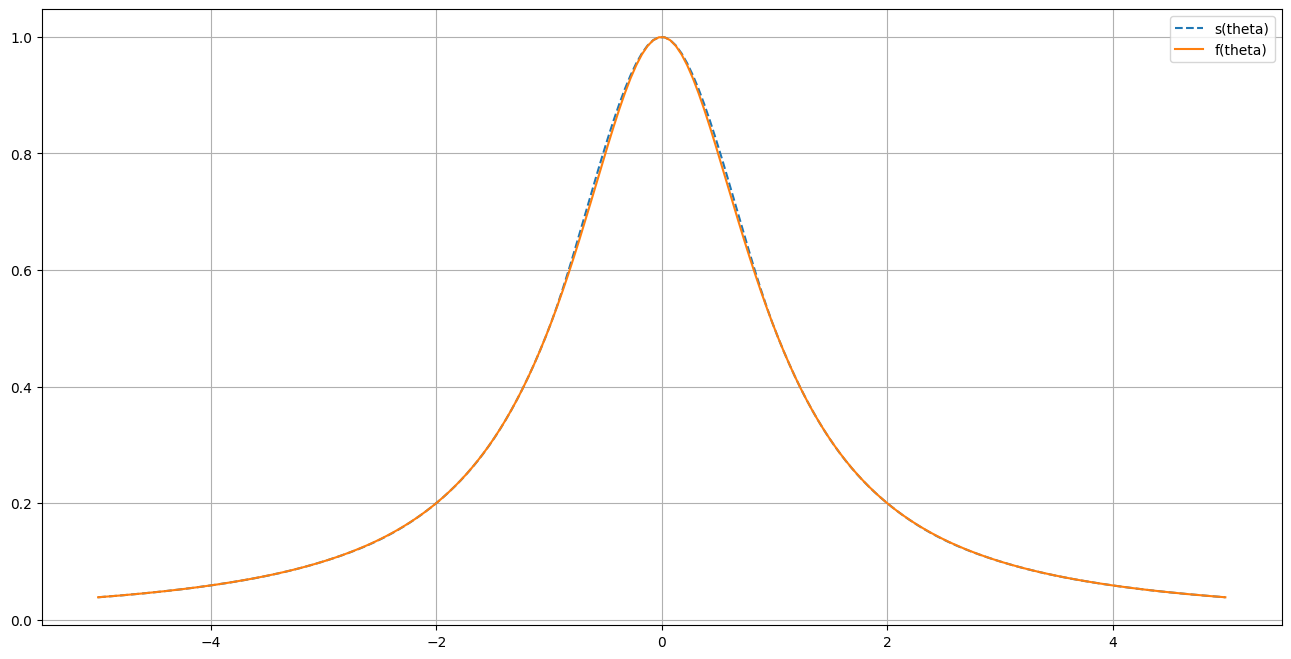

In [135]:
def fprim(t):
    return -2 * t / (1 + t**2)**2

t = np.arange(-5.0, 6.0, 1)
y = f(t)
z = fprim(t)
theta = np.linspace(-5, 5, 100)

def interpol3(y, z, t, theta):
    s = np.zeros_like(theta)
    for i in range(len(t)):
        s += y[i] * q(theta - t[i]) + z[i] * r(theta - t[i])
    return s

s = interpol3(y, z, t, theta)


plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(theta, s, '--', label="s(theta)")
plt.plot(theta, f(theta), '-', label="f(theta)")
# plt.plot(t, z, 'b-', label="derivee de f")
plt.legend()
plt.show()